In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re

# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max columns to none
pd.set_option('display.max_rows', None)

In [2]:
file_observations = '../1_scraping/scraped_data/cleaned/observation_details_116_clean.csv'

# Load the data
halsbandparkiet = pd.read_csv(file_observations, header=0, index_col="observation_id")
print(f"observation count before dropna {halsbandparkiet.shape[0]}")

# drop observations with missing crucial data
halsbandparkiet = halsbandparkiet.dropna(subset = ['species_id', 'species_name', 'date', 'gps_coordinates']) 
print(f"observation count after dropna {halsbandparkiet.shape[0]}")

# clean columns
halsbandparkiet['date'] = pd.to_datetime(halsbandparkiet['date'], format="mixed", errors='coerce')
halsbandparkiet["species_id"] = halsbandparkiet["species_id"].astype(int) # int parsing

halsbandparkiet["amount"] = halsbandparkiet["amount"].apply(lambda x: re.findall(r"\d+", x)[0]).astype(int) # only keep the amount and cast as int

# location needs to stay a float, because there are a lot of NaN values
# observations_hp["location_id"] = observations_hp["location_id"].astype(int) # int parsing
halsbandparkiet_without_location = halsbandparkiet[halsbandparkiet["location_id"].isnull()]
print(f"observations without location {halsbandparkiet_without_location.shape[0]}")

# Longitude, Latitude
halsbandparkiet["Latitude"] = halsbandparkiet["gps_coordinates"].apply(lambda x: x.split(', ')[0]) # NB
halsbandparkiet["Longitude"] = halsbandparkiet["gps_coordinates"].apply(lambda x: x.split(', ')[1]) # OL

print(f"halsbandparkiet bevat {halsbandparkiet.shape[0]} observaties")
halsbandparkiet.head(5)

observation count before dropna 96951
observation count after dropna 96551
observations without location 857
halsbandparkiet bevat 96551 observaties


,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,Latitude,Longitude
observation_id,,,,,,,,,,,,,,,,,,,
336301369,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8585, 4.6717",33m,iObs,2024-12-31 16:45:00,1,onbekend,ter plaatse,30919.0,Heverlee - Egenhoven - Egenhoven Bos (VB),40236.0,Frederik Fluyt,onbekend,onbekend,50.8585,4.6717
336233189,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8044, 4.6010",30m,Showcase,2024-12-31 16:00:00,1,onbekend,ter plaatse,30976.0,Loonbeek - Korenheide (VB),3528.0,Externe bron,geen,onbekend,50.8044,4.6010
336205268,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8584, 4.2921",3m,ObsMapp,2024-12-31 15:29:00,6,onbekend,foeragerend,32596.0,Berchem-Ste-Agathe/St-Agatha-Berchem - Koninck...,72841.0,Sara Velghe,onbekend,gezien en gehoord,50.8584,4.2921
336194978,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.9315, 4.3675",13m,ObsIdentify,2024-12-31 15:21:00,1,onbekend,ter plaatse,23260.0,Grimbergen (VB),359678.0,Kristof Vynckier,geen,onbekend,50.9315,4.3675
336193018,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.7396, 3.3351",14m,Site,2024-12-31 14:57:00,4,onbekend,ter plaatse,27358.0,Kooigem (WV),201247.0,Lore Vander Plancken,geen,gezien,50.7396,3.3351


In [8]:
halsbandparkiet[halsbandparkiet["Latitude"].isnull() | halsbandparkiet["Longitude"].isnull() ]

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,Latitude,Longitude
observation_id,,,,,,,,,,,,,,,,,,,


In [3]:
# create geopandas
gdf_halsbandparkiet = gpd.GeoDataFrame(halsbandparkiet, 
                                       geometry=gpd.points_from_xy(halsbandparkiet.Longitude,halsbandparkiet.Latitude),
                                       crs="EPSG:4326")
gdf_halsbandparkiet.head()

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,Latitude,Longitude,geometry
observation_id,,,,,,,,,,,,,,,,,,,,
336301369,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8585, 4.6717",33m,iObs,2024-12-31 16:45:00,1,onbekend,ter plaatse,30919.0,Heverlee - Egenhoven - Egenhoven Bos (VB),40236.0,Frederik Fluyt,onbekend,onbekend,50.8585,4.6717,POINT (4.6717 50.8585)
336233189,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8044, 4.6010",30m,Showcase,2024-12-31 16:00:00,1,onbekend,ter plaatse,30976.0,Loonbeek - Korenheide (VB),3528.0,Externe bron,geen,onbekend,50.8044,4.6010,POINT (4.601 50.8044)
336205268,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.8584, 4.2921",3m,ObsMapp,2024-12-31 15:29:00,6,onbekend,foeragerend,32596.0,Berchem-Ste-Agathe/St-Agatha-Berchem - Koninck...,72841.0,Sara Velghe,onbekend,gezien en gehoord,50.8584,4.2921,POINT (4.2921 50.8584)
336194978,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.9315, 4.3675",13m,ObsIdentify,2024-12-31 15:21:00,1,onbekend,ter plaatse,23260.0,Grimbergen (VB),359678.0,Kristof Vynckier,geen,onbekend,50.9315,4.3675,POINT (4.3675 50.9315)
336193018,116,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"50.7396, 3.3351",14m,Site,2024-12-31 14:57:00,4,onbekend,ter plaatse,27358.0,Kooigem (WV),201247.0,Lore Vander Plancken,geen,gezien,50.7396,3.3351,POINT (3.3351 50.7396)


In [20]:
gdf_halsbandparkiet.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 96551 entries, 336301369 to 233392391
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   species_id               96551 non-null  int64         
 1   species_name             96551 non-null  object        
 2   species_name_scientific  96551 non-null  object        
 3   validation               96551 non-null  object        
 4   gps_coordinates          96551 non-null  object        
 5   accuracy                 96493 non-null  object        
 6   source                   92386 non-null  object        
 7   date                     96551 non-null  datetime64[ns]
 8   amount                   96551 non-null  int64         
 9   life_stage               96180 non-null  object        
 10  activity                 96180 non-null  object        
 11  location_id              95694 non-null  float64       
 12  location         

In [21]:
halsbandparkiet.describe(include='all')

,species_id,species_name,species_name_scientific,validation,gps_coordinates,accuracy,source,date,amount,life_stage,activity,location_id,location,observer_id,observer_name,counting_method,method,Latitude,Longitude
count,96551.0,96551,96551,96551,96551,96493,92386,96551,96551.000000,96180,96180,95694.000000,95694,9.639400e+04,96394,96551,96551,96551,96551
unique,NaN,1,1,5,63817,378,26,NaN,NaN,19,44,NaN,3075,NaN,6008,7,15,8078,11229
top,NaN,Halsbandparkiet,Psittacula krameri,Goedgekeurd (automatische validatie),"51.0509, 4.3699",10m,Site,NaN,NaN,onbekend,ter plaatse,NaN,Willebroek (AN),NaN,Wim Van den Bossche,onbekend,onbekend,51.0509,4.3699
freq,NaN,96551,96551,57468,961,24830,46233,NaN,NaN,87789,56128,NaN,7041,NaN,14471,79123,60631,1759,1202
mean,116.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-30 01:02:40.495075072,4.905760,NaN,NaN,60560.293874,NaN,8.826089e+04,NaN,NaN,NaN,NaN,NaN
min,116.0,NaN,NaN,NaN,NaN,NaN,NaN,1971-10-03 00:00:00,1.000000,NaN,NaN,23088.000000,NaN,1.850000e+02,NaN,NaN,NaN,NaN,NaN
25%,116.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-14 00:00:00,1.000000,NaN,NaN,24033.000000,NaN,4.042000e+04,NaN,NaN,NaN,NaN,NaN
50%,116.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-19 19:35:00,2.000000,NaN,NaN,29069.000000,NaN,4.645600e+04,NaN,NaN,NaN,NaN,NaN
75%,116.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-03 00:00:00,3.000000,NaN,NaN,41806.000000,NaN,9.407500e+04,NaN,NaN,NaN,NaN,NaN
max,116.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31 16:45:00,983.000000,NaN,NaN,724090.000000,NaN,1.058369e+06,NaN,NaN,NaN,NaN,NaN


In [14]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import datetime

# gdf_halsbandparkiet = gdf_halsbandparkiet[(gdf_halsbandparkiet["date"] > datetime.datetime(1970,1,1)) & (gdf_halsbandparkiet["date"] < datetime.datetime(1985,1,1))]

# Extract latitude and longitude from Point geometry
gdf_halsbandparkiet["lat"] = gdf_halsbandparkiet.geometry.y
gdf_halsbandparkiet["lon"] = gdf_halsbandparkiet.geometry.x


# Create a folium map centered on the data
m = folium.Map(location=[gdf_halsbandparkiet["lat"].mean(), gdf_halsbandparkiet["lon"].mean()], zoom_start=8)

# Add heatmap layer
heat_data = list(zip(gdf_halsbandparkiet["lat"], gdf_halsbandparkiet["lon"]))
HeatMap(heat_data, min_opacity=0.5, max_zoom=8, radius=5, overlay=False, show=True).add_to(m)

# Save or display the map
m.save("heatmap.html")
m

ValueError: Location values cannot contain NaNs.

NameError: name 'x' is not defined

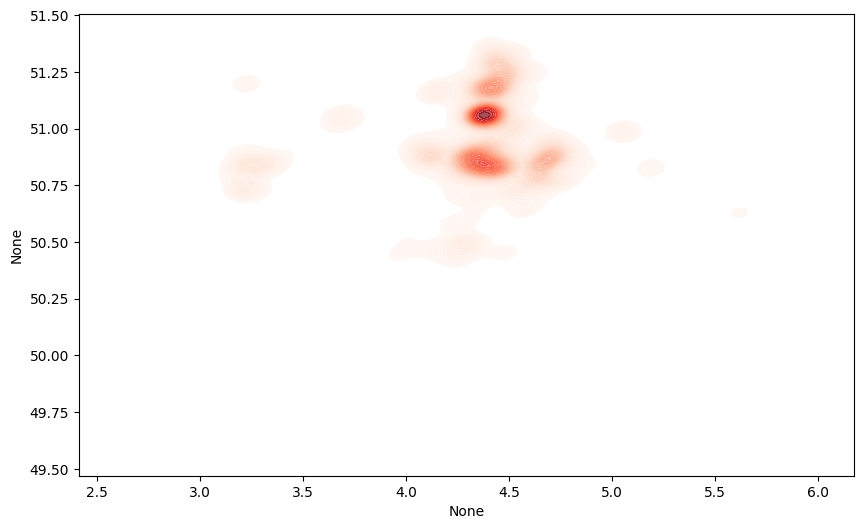

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(x=gdf_halsbandparkiet.geometry.x, y=gdf_halsbandparkiet.geometry.y, cmap="Reds", fill=True, levels=50, alpha=0.7)

plt.scatter(x, y, s=5, color="black", alpha=0.5)  # Overlay points
plt.title("Spatial Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()